In [ ]:
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc
import csv

%cd C:\Users\yagxyz\Downloads\ula
import yf

In [ ]:
numdata = np.zeros((32760,10), dtype=float) #matriz numerica dos dados iqs
SNR = 10 #dB

csvfile = "/Users/yagxyz/Downloads/ula/S_IQs/Ang-fc_sweet/IQs_2.442GHz.csv"
data = read_csv(csvfile)
numdata=data.to_numpy(dtype=float)

ant_amost = np.zeros((1,181,18), dtype=float)

i1 = np.zeros((181,18), dtype=float)
i2 = np.zeros((181,18), dtype=float)
i3 = np.zeros((181,18), dtype=float)
i4 = np.zeros((181,18), dtype=float)
q1 = np.zeros((181,18), dtype=float)
q2 = np.zeros((181,18), dtype=float)
q3 = np.zeros((181,18), dtype=float)
q4 = np.zeros((181,18), dtype=float)

num_amost = 18 #Amostras IQs do CTE
for i_angle in range(181):
  i1[i_angle] = yf.noise_gen(numdata[num_amost*i_angle:num_amost+num_amost*i_angle,2],SNR)
  i2[i_angle] = yf.noise_gen(numdata[num_amost*i_angle:num_amost+num_amost*i_angle,3],SNR)
  i3[i_angle] = yf.noise_gen(numdata[num_amost*i_angle:num_amost+num_amost*i_angle,4],SNR)
  i4[i_angle] = yf.noise_gen(numdata[num_amost*i_angle:num_amost+num_amost*i_angle,5],SNR)

  q1[i_angle] = yf.noise_gen(numdata[num_amost*i_angle:num_amost+num_amost*i_angle,6],SNR)
  q2[i_angle] = yf.noise_gen(numdata[num_amost*i_angle:num_amost+num_amost*i_angle,7],SNR)
  q3[i_angle] = yf.noise_gen(numdata[num_amost*i_angle:num_amost+num_amost*i_angle,8],SNR)
  q4[i_angle] = yf.noise_gen(numdata[num_amost*i_angle:num_amost+num_amost*i_angle,9],SNR)

iq1 = i1 + 1j*q1
iq2 = i2 + 1j*q2
iq3 = i3 + 1j*q3
iq4 = i4 + 1j*q4

In [ ]:
iqs = np.zeros((4,18),dtype=complex)
ang_resul = np.zeros((181),dtype=float)

for angle in range(181):
  iqs[0,:] = iq1[angle]
  iqs[1,:] = iq2[angle]
  iqs[2,:] = iq3[angle]
  iqs[3,:] = iq4[angle]

  a, b = yf.dmusic(iqs, 2.442)

  ang_resul[angle] = a

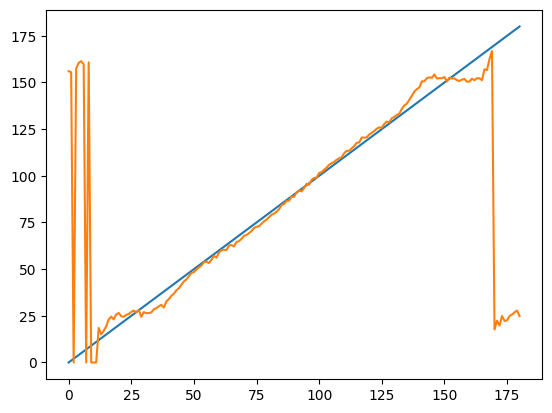

In [ ]:
plt.plot(np.linspace(0,180,181))
plt.plot(ang_resul)

In [ ]:
# with open('/Users/yagxyz/Downloads/music_15dB.csv', 'w', newline='') as file:
#   writer = csv.writer(file)
#   writer.writerow(ang_resul)